# Importing libraries

In [97]:
import pandas as pd              # data analysis
import numpy as np               # scientific computing
import seaborn as sn             # plotting
import matplotlib.pyplot as plt  # plotting
%matplotlib inline

from imblearn.under_sampling import RandomUnderSampler # for random sampling
from sklearn.preprocessing import StandardScaler       # for scaling the data

# Data overview

In [98]:
ds_train = pd.read_csv("../dataset/test.csv")

In [99]:
ds_train.head(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [100]:
len(ds_train)

418

# Exploratory Data Analysis

### Checking for Missing Data

In [101]:
# missing values in each column
ds_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [102]:
# total missing values
ds_train.isnull().sum().sum()

414

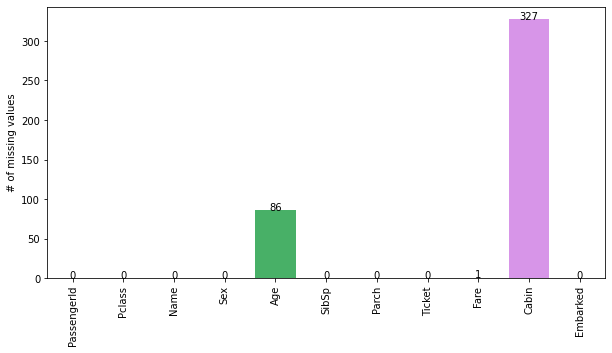

In [103]:
# variables
X = ds_train.columns
Y = ds_train.isnull().sum()

# setting plot size
plt.figure(figsize = (10, 5))

# plotting
sn.barplot(x = X, y = Y)

# adding labels
plt.xticks(rotation = 90)
plt.ylabel("# of missing values")

for i in range(len(X)):
    plt.text(i, Y[i], Y[i], ha = 'center')

plt.show()

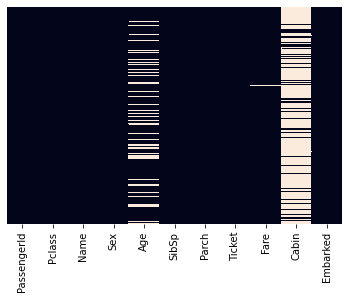

In [104]:
sn.heatmap(ds_train.isnull(), yticklabels = False, cbar = False)
plt.show()

#### Notes on missing data
Age: it is reasonable replace the missing values with some form of imputation.

Cabin: either will be dropped or transformed into a different variable.

Embarked: drop the 2 rows with missing values

### Handling missing data

#### Age

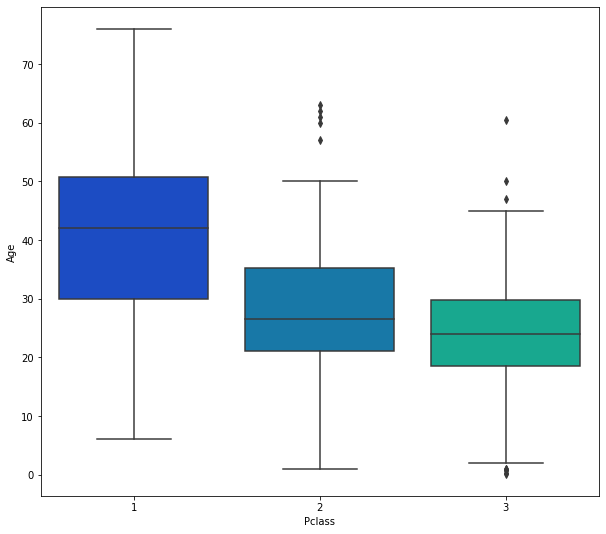

In [105]:
plt.figure(figsize = (10, 9))
sn.boxplot(data = ds_train, x = 'Pclass', y = 'Age', palette = 'winter')
plt.show()

#### Notes on Age
It seems 'Age' is correlated with 'Pclass'. Then, replace 'Age' null values based on 'Pclass'. 

In [106]:
nafill_pclass1 = np.mean(ds_train[ds_train['Pclass'] == 1]['Age'].dropna()).round()
nafill_pclass1

41.0

In [107]:
nafill_pclass2 = np.median(ds_train[ds_train['Pclass'] == 2]['Age'].dropna()).round()
nafill_pclass2

26.0

In [108]:
nafill_pclass3 = np.median(ds_train[ds_train['Pclass'] == 3]['Age'].dropna()).round()
nafill_pclass3

24.0

In [109]:
# replace missing values
def nafill_age(ds):
    age = ds['Age']
    pclass = ds['Pclass']
    
    if pd.isnull(age):
        if pclass == 1:
            return nafill_pclass1
        elif pclass == 2:
            return nafill_pclass2
        else:
            return nafill_pclass3
    else:
        return age

In [110]:
# replace NAs
ds_train['Age'] = ds_train[['Age', 'Pclass']].apply(nafill_age, axis = 1)

In [111]:
ds_train['Age'].isnull().sum()

0

#### Cabin && embarked

In [112]:
# drop 'Cabin' column entirely
ds_train.drop('Cabin', axis = 1, inplace = True)

In [113]:
# drop 'Embarked' NA rows 
ds_train.fillna(0, inplace = True)

In [114]:
ds_train.head(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q


In [115]:
ds_train.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Transforming categorical data

In [116]:
ds_train['Sex'].nunique()

2

In [117]:
ds_train['Embarked'].nunique()

3

In [118]:
sex = pd.get_dummies(ds_train['Sex'], drop_first = True)
sex.head(3)

,male
0,1
1,0
2,1


In [119]:
embarked = pd.get_dummies(ds_train['Embarked'], drop_first = True)
embarked.head(3)

,Q,S
0,1,0
1,0,1
2,1,0


In [120]:
# rename columns
sex.rename(columns = {"male": "Sex_male"}, inplace = True)
embarked.rename(columns = {"Q": "Embarked_Q", 
                           "S": "Embarked_S"}, inplace = True)

In [121]:
ds_train = pd.concat([ds_train, sex, embarked], axis = 1)

In [122]:
ds_train.head(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S,1,0,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q,0,1,0


### Removing unneccessary columns

In [123]:
ds_train.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)

In [124]:
ds_train.head(7)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1
5,897,3,14.0,0,0,9.2250,1,0,1
6,898,3,30.0,0,0,7.6292,0,1,0


In [125]:
ds_train.to_csv('../dataset/final_test.csv')

### Performing standartization upon Age and Fare (to scale it down)

In [126]:
scaler = StandardScaler()

In [127]:
ds_train[['Age', 'Fare']] = scaler.fit_transform(ds_train[['Age', 'Fare']])

In [128]:
ds_train.head(7)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,0.395737,0,0,-0.496637,1,1,0
1,893,3,1.360386,1,0,-0.511497,0,0,1
2,894,2,2.517965,0,0,-0.463335,1,1,0
3,895,3,-0.183053,0,0,-0.481704,1,0,1
4,896,3,-0.568912,1,1,-0.416740,0,0,1
5,897,3,-1.186288,0,0,-0.471623,1,0,1
6,898,3,0.048463,0,0,-0.500221,0,1,0


In [129]:
ds_train.to_csv('../dataset/final_test_std.csv')

In [130]:
len(ds_train)

418